

# Credit Card Users Churn Prediction - Problem Statement


## Context

Thera Bank has recently observed a sharp decline in the number of credit card users. Credit cards are a significant source of revenue for the bank through various fees, such as annual charges, transaction fees, late payment penalties, and foreign exchange fees. The loss of customers using credit card services directly impacts the bank’s profitability. To mitigate this issue, Thera Bank seeks to understand the reasons behind customer attrition and identify patterns in customer behavior that lead to churn.

### Problem Statement
The objective of this analysis is to develop a classification model that can predict which customers are likely to discontinue their credit card services. By exploring customer data, identifying key influencing factors, and building predictive models, the bank can take proactive measures to retain customers. Additionally, actionable insights and recommendations will help improve customer satisfaction, optimize service offerings, and reduce churn, ultimately enhancing the bank’s overall financial performance.

### Data Dictionary

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: The gender of the account holder
- Dependent_count: Number of dependents
- Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-
Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_lnactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total-Trans-Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total-Ct-Chng-Q4_01: Ratio of the total transaction count in 4th quarter and the total transaction count in the 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in the 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


##Objective
The primary objective of this analysis is to develop a machine learning-based classification model to predict customer churn in Thera Bank’s credit card services. By leveraging customer data, the goal is to identify key factors influencing attrition and uncover actionable insights that can help the bank retain customers. The model should effectively differentiate between customers who are likely to stay and those who may leave, enabling the bank to implement targeted retention strategies. Additionally, recommendations will be provided to enhance customer engagement, optimize service offerings, and improve overall customer satisfaction, ultimately reducing churn and safeguarding the bank’s revenue.








### Let us start by importing the required libraries

In [105]:
# code to import necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# For preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Suppress warnings and set plot style
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### Understanding the structure of the data

In [70]:

# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
file_path = '/content/BankChurners.csv'
df = pd.read_csv(file_path)



#Data Overview :
- to understand the dataset

### Displaying the first few rows of the dataset

In [73]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Checking the shape of the dataset

In [74]:
df.shape

(10127, 21)

### Checking the data types of the columns for the dataset

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Statistical summary of the dataset

In [76]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Check for missing values and basic statistics:

In [77]:
# Check missing values count
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
Education_Level,1519
Marital_Status,749


Therefore there are missing values
- 1,519 missing values in Education_Level

- 749 missing values in Marital_Status

## Fixing missing values

Since these are categorical variables, we will fill missing values with the most frequent category (mode). ​

In [78]:
# Fill missing values with mode
df["Education_Level"].fillna(df["Education_Level"].mode()[0], inplace=True)
df["Marital_Status"].fillna(df["Marital_Status"].mode()[0], inplace=True)

# Verify missing values are handled
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


## Univariate and Bivariate analysis

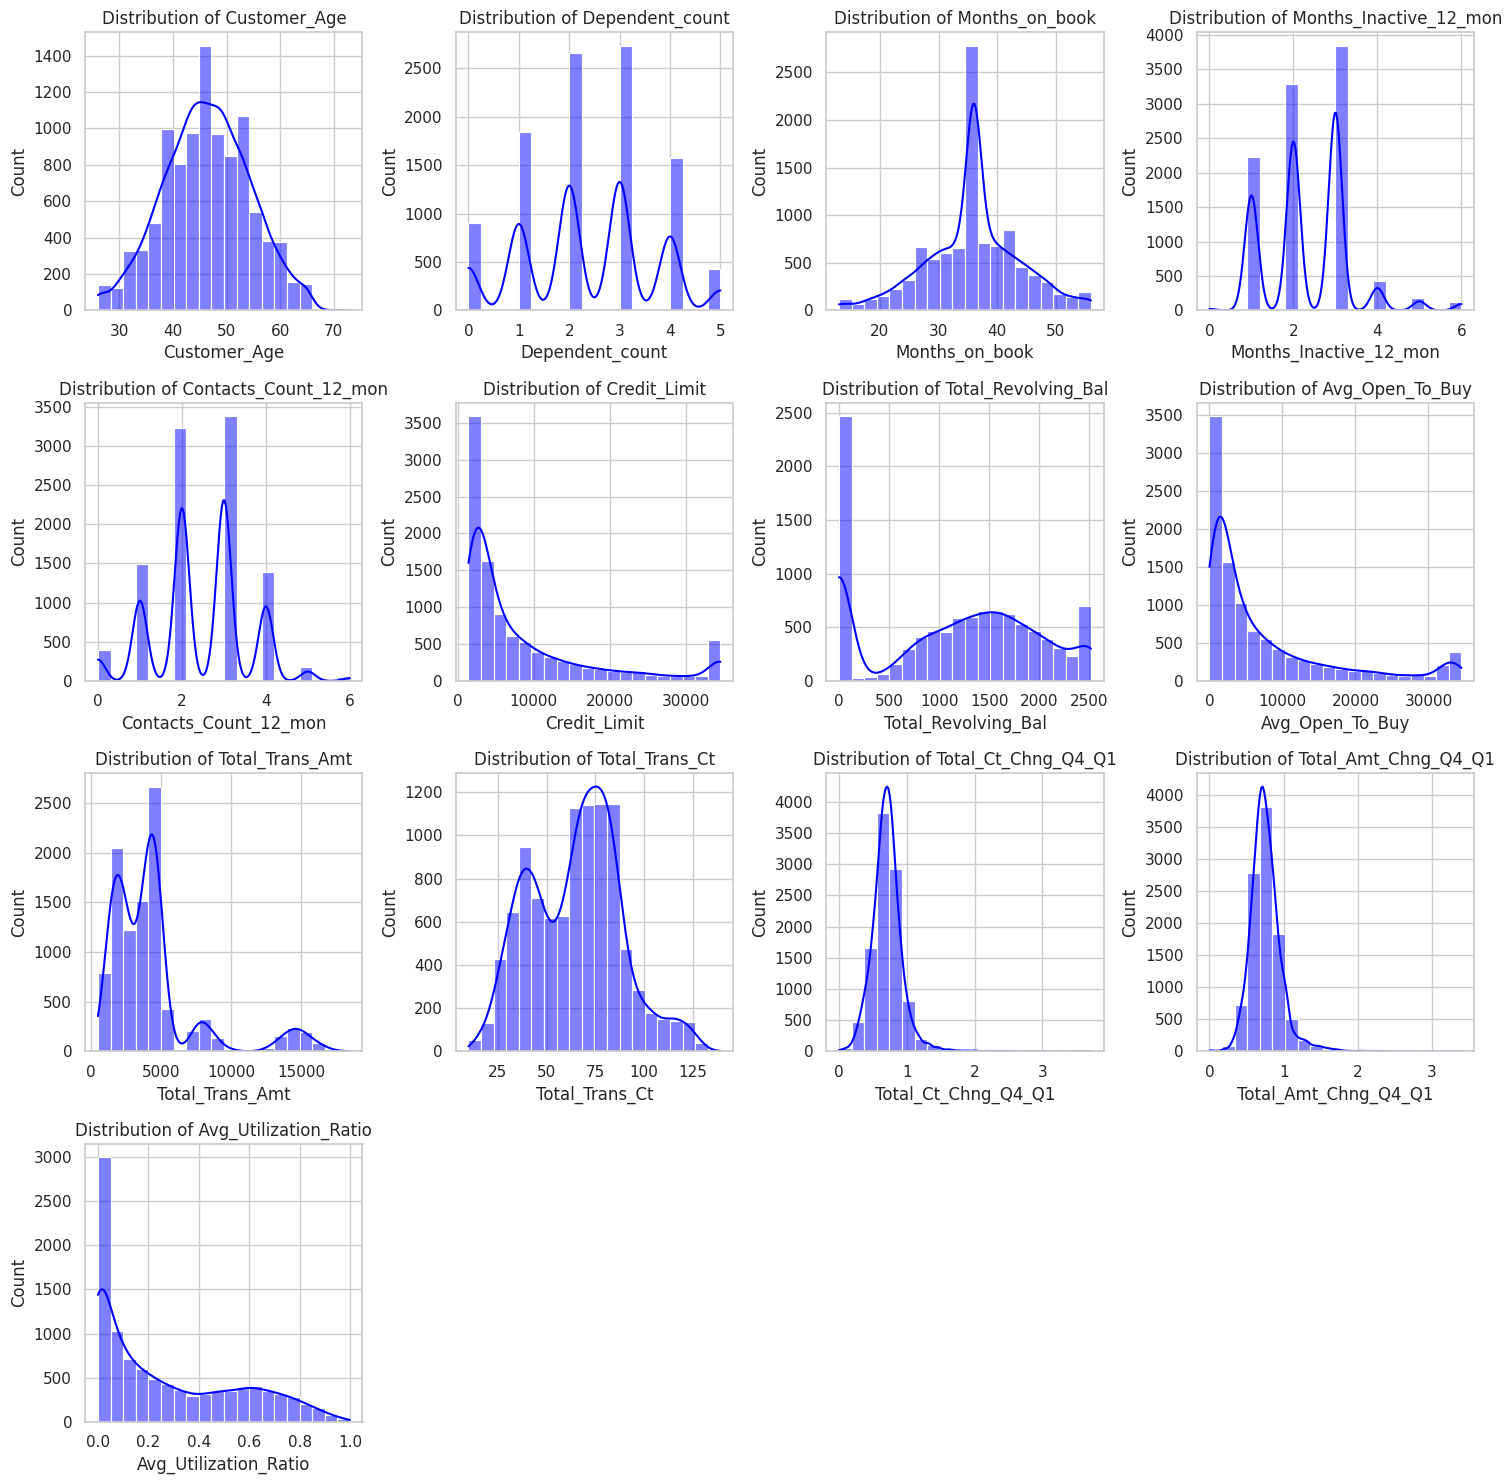

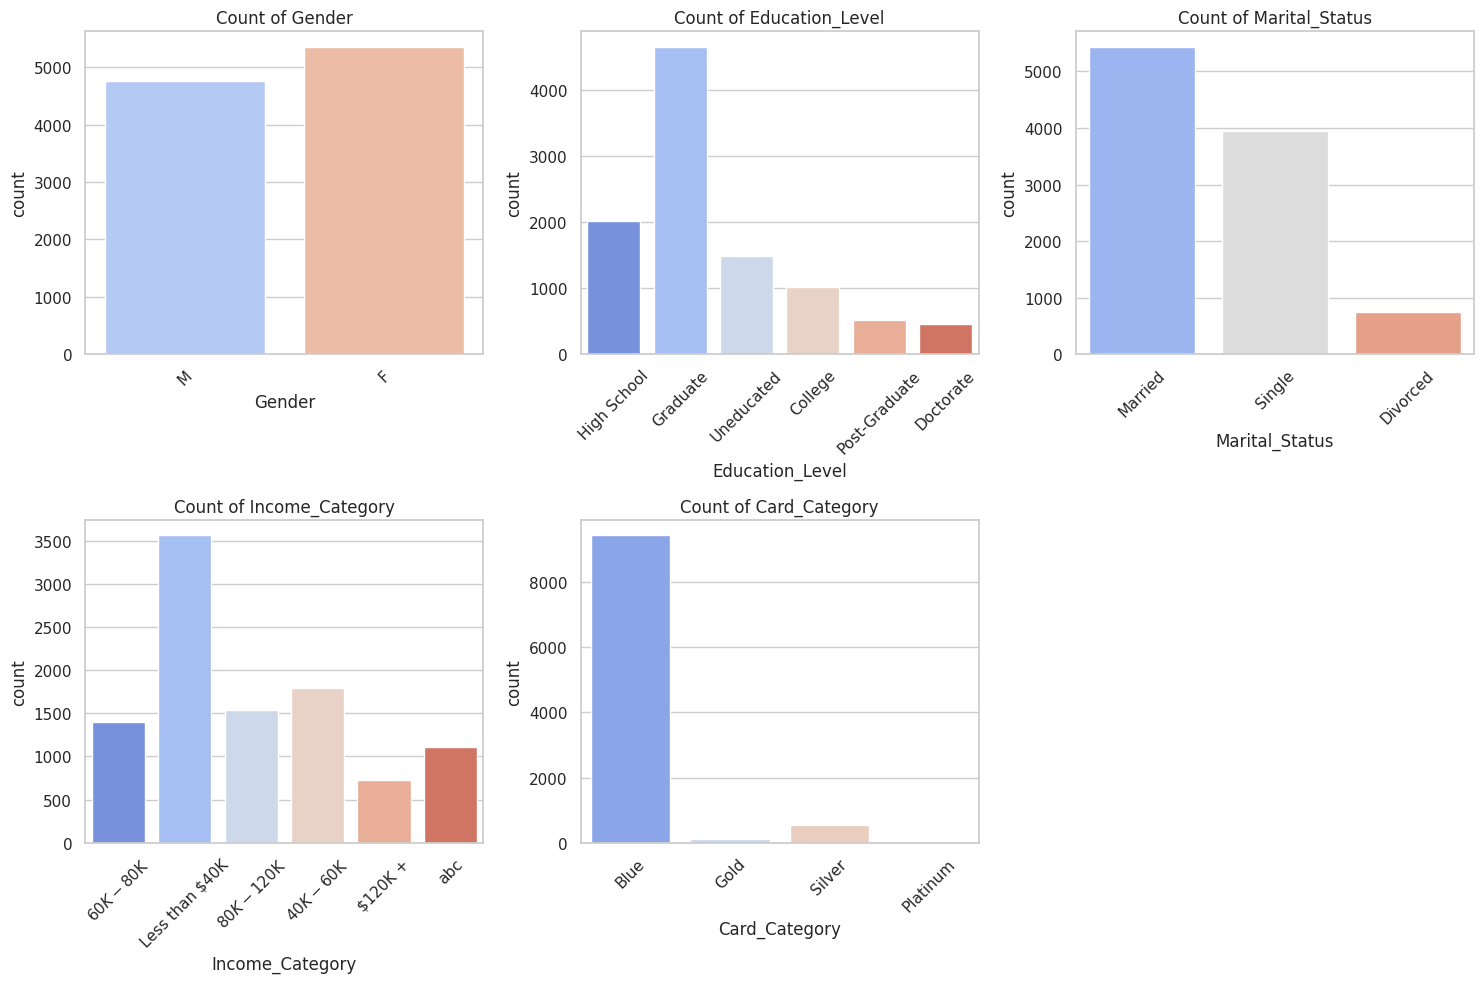

In [79]:
# Set style
sns.set_style("whitegrid")

# Separate numerical and categorical columns
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Months_Inactive_12_mon',
                      'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                      'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1',
                      'Avg_Utilization_Ratio']

categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Plot Univariate Analysis for numerical variables
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], kde=True, bins=20, color="blue")
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Plot Univariate Analysis for categorical variables
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[feature], palette='coolwarm')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observations from Univariate Analysis:


- Customer_Age: The distribution shows that most customers are between the ages of 30 and 60, with a few outliers on both extremes.

- Dependent_count: This feature has most values between 0 and 5 dependents, with a few customers having larger numbers.

- Months_on_book: Customers are mostly long-term clients, with the majority of the values ranging from 20 to 60 months, though there are some short-term customers.

- Months_Inactive_12_mon: This variable shows a wide range of activity, from inactive customers (0 months) to those who have been inactive for several months.

- Contacts_Count_12_mon: Most customers seem to contact the bank between 0 and 5 times in the last year.

- Credit_Limit: The distribution of credit limits is skewed, with many customers having limits between $1,000 and $25,000.

- Total_Revolving_Bal: This feature has a skewed distribution with many customers having a balance close to zero, but a few customers carry higher revolving balances.

- Avg_Open_To_Buy: This variable shows a right-skewed distribution, with many customers using most of their available credit.

- Total_Trans_Amt: The total transaction amount shows a wide range, with the majority of customers having a relatively low transaction amount in the last 12 months.

- Total_Trans_Ct: Most customers have a smaller number of transactions (less than 100).

- Total_Ct_Chng_Q4_Q1: This feature has a varied distribution indicating fluctuating transaction activity across quarters.

- Avg_Utilization_Ratio: Most customers have a low utilization ratio, showing they don’t use the majority of their available credit.

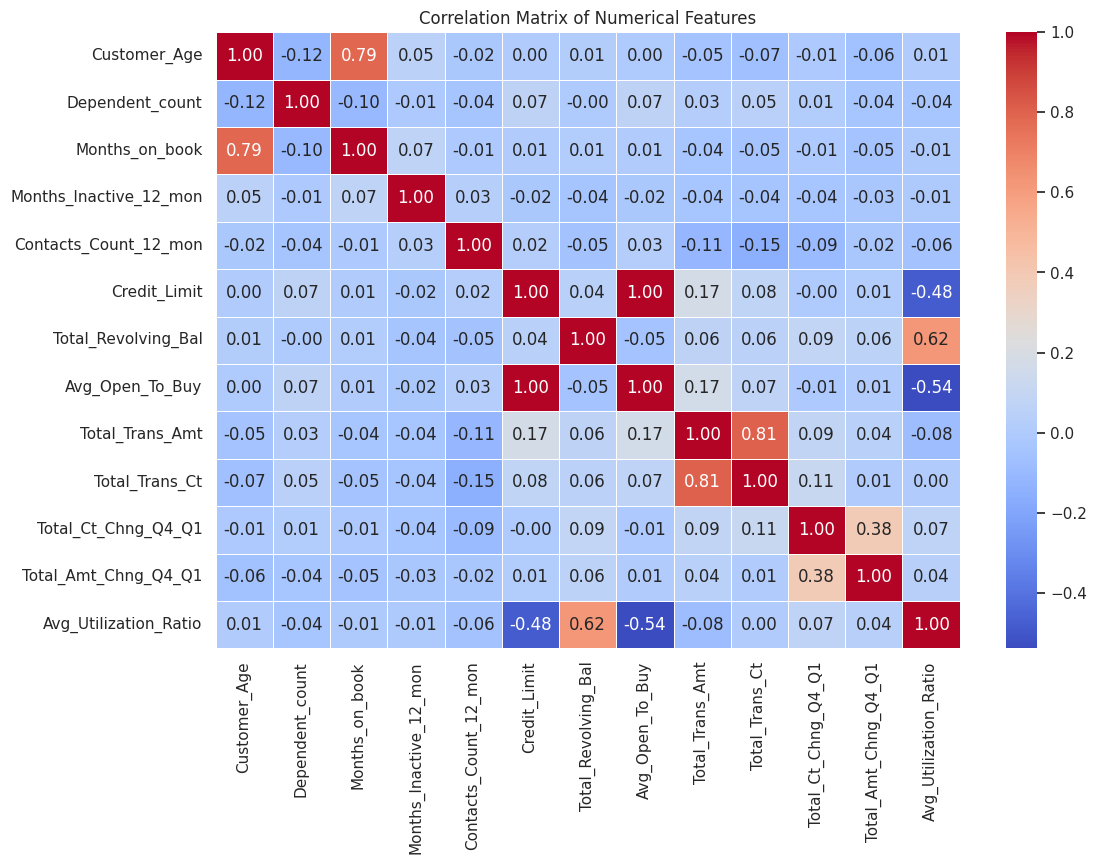

In [80]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


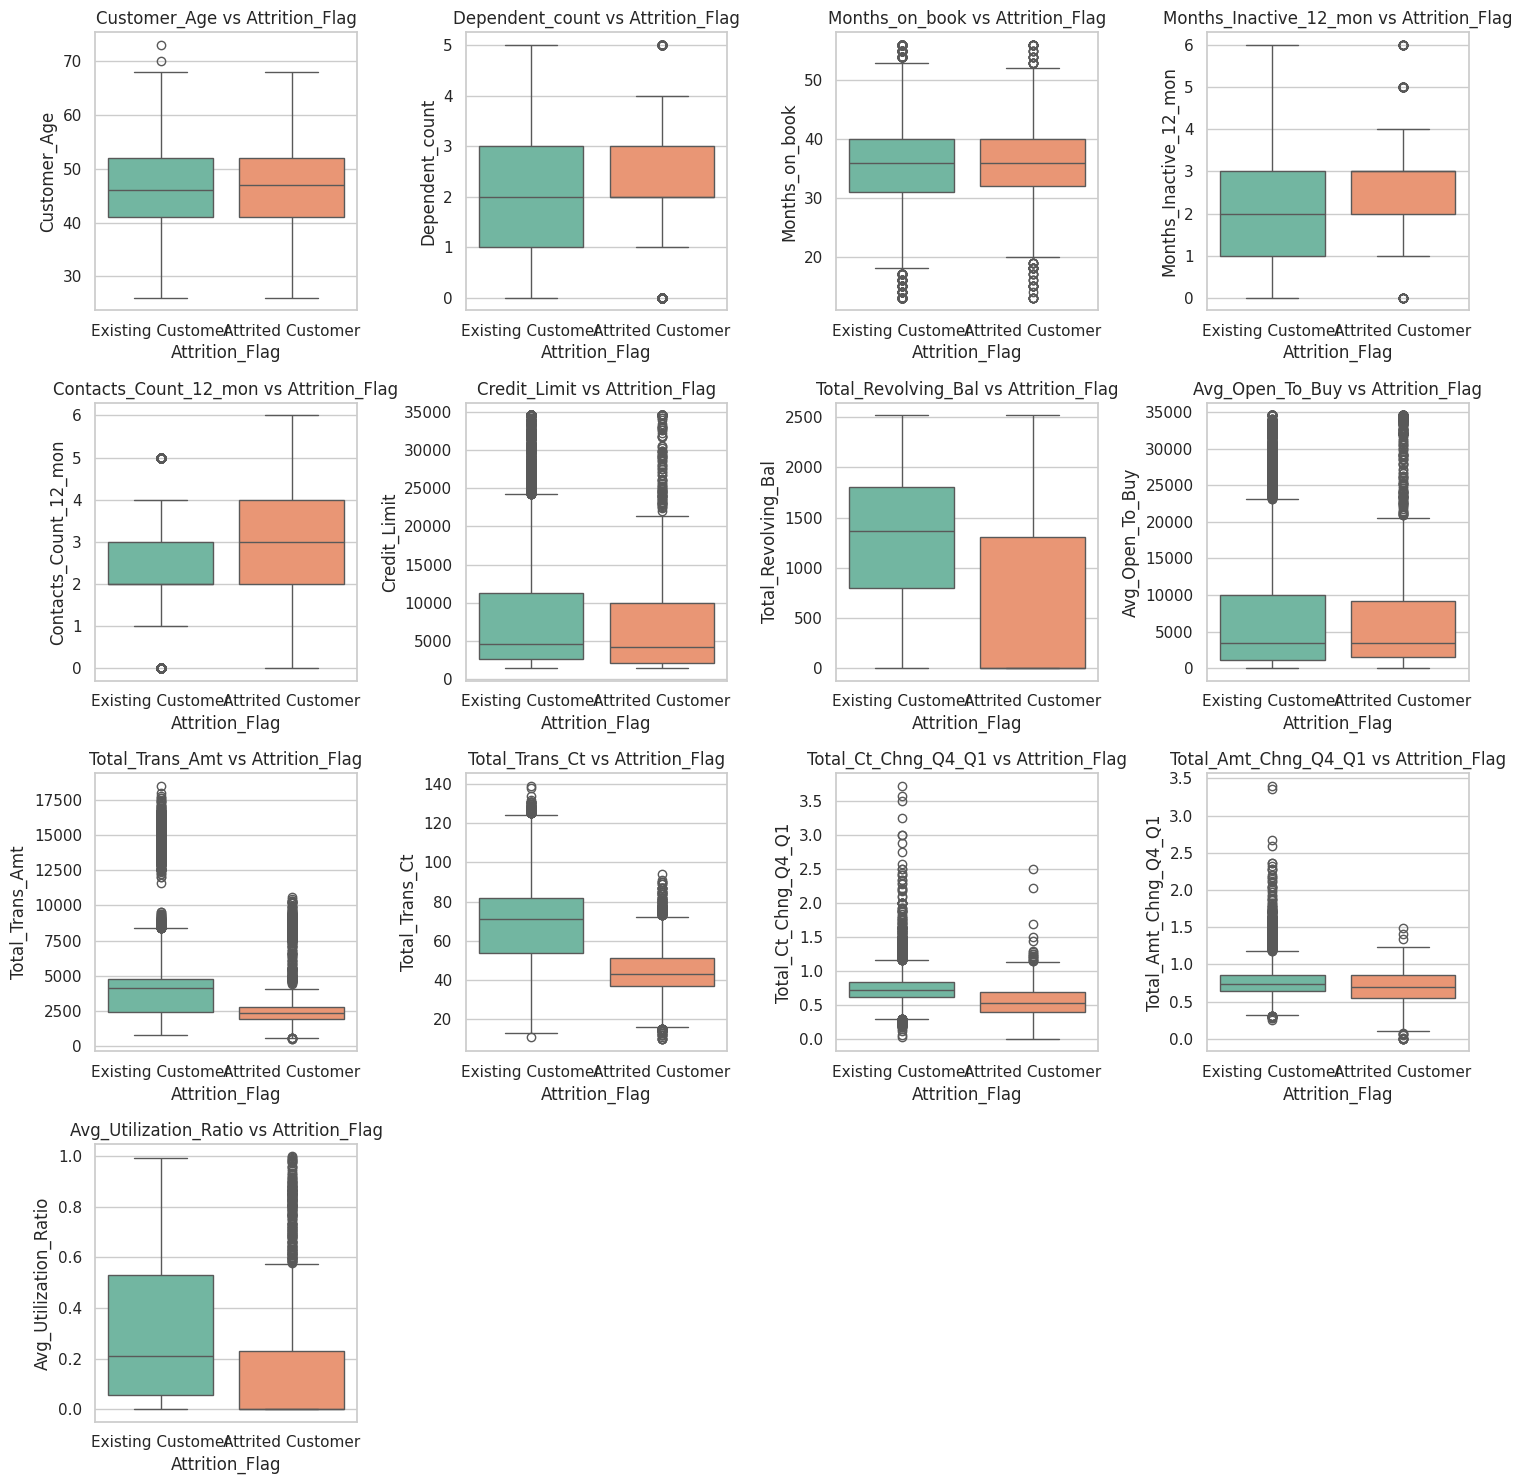

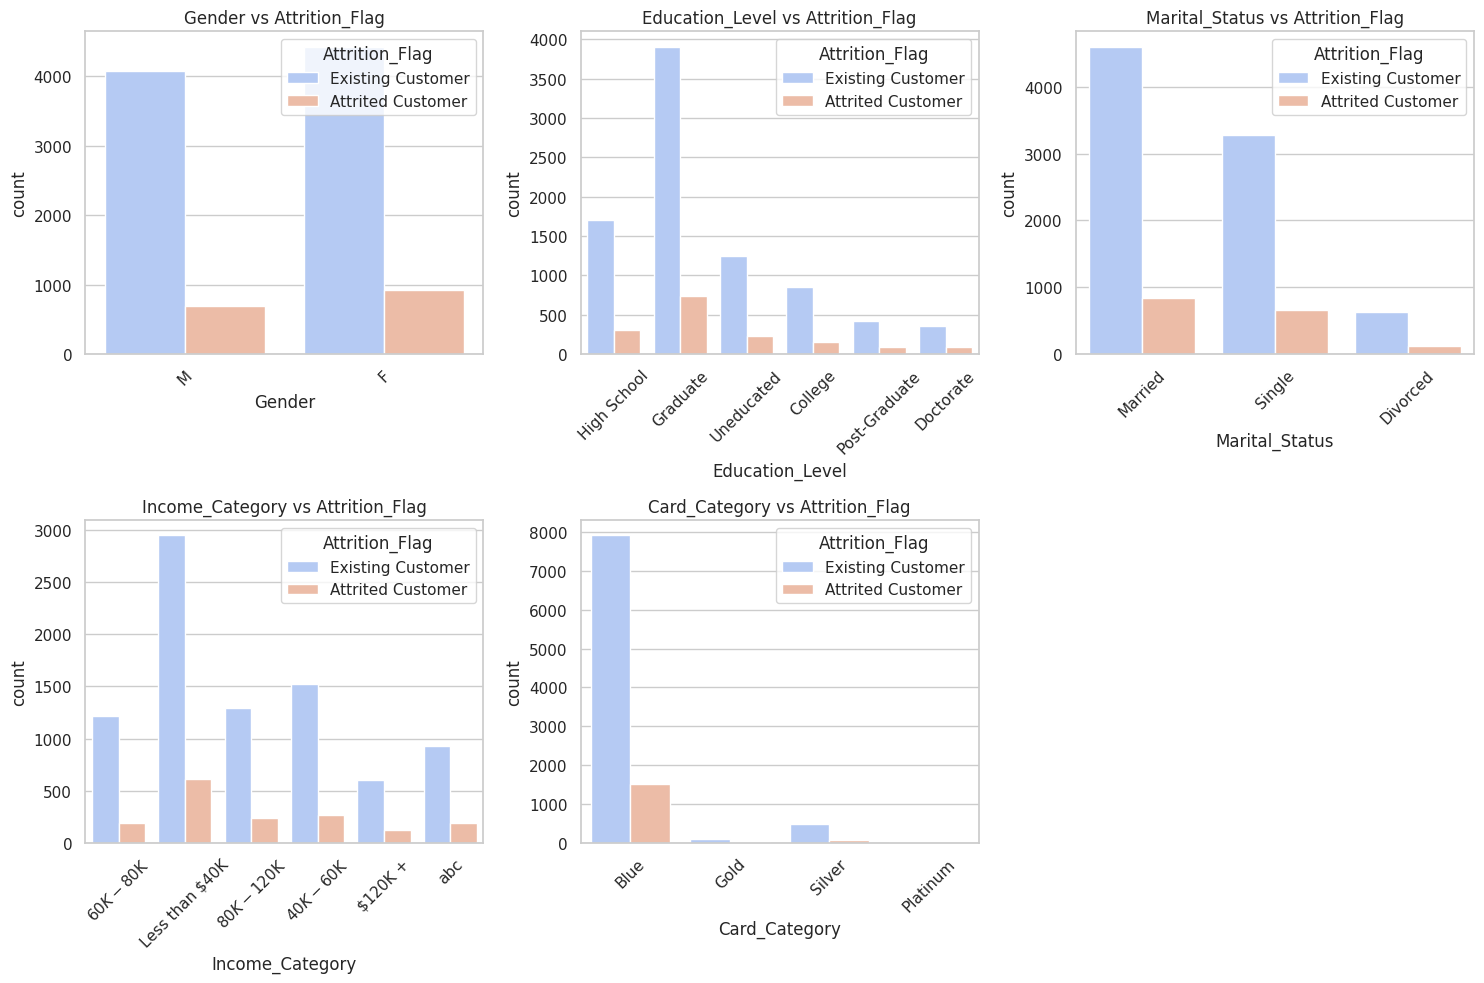

In [81]:
# Bivariate Analysis: Numerical features vs. Attrition_Flag
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Attrition_Flag', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs Attrition_Flag')
plt.tight_layout()
plt.show()

# Bivariate Analysis: Categorical features vs. Attrition_Flag
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Attrition_Flag', data=df, palette='coolwarm')
    plt.title(f'{feature} vs Attrition_Flag')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Bivariate Analysis: Correlation Insights
1. Gender vs Attrition Flag -

- The number of existing male and female customers is almost equal.
- However, attrition is slightly higher among female customers.

- Inference: Gender does not seem to be a strong indicator of churn, though females show a marginally higher attrition rate.

2. Education Level vs Attrition Flag -
- Most customers are graduates or have completed high school.

- The attrition rate appears higher among "Graduate" and "High School" groups.

- Inference: Higher education levels do not necessarily reduce customer churn.

3. Marital Status vs Attrition Flag -
- Married customers form the largest group, followed by single customers.

- The attrition rate is highest among married customers.

- Inference: Marital status alone is not a strong predictor of churn, but married customers may have different banking needs affecting their retention.

4. Income Category vs Attrition Flag -
- Customers earning between $60K - $80K are the largest group.

- Attrition is more evenly spread across income categories, but lower-income groups (<$40K) show slightly higher attrition.

- Inference: Income level has some effect on churn, with lower-income groups possibly being more prone to closing their accounts.

5. Card Category vs Attrition Flag -
- The majority of customers have Blue cards.

- Most of the attrition happens in the Blue category.

- Inference: Premium cardholders (Gold, Silver, Platinum) tend to have lower attrition, possibly due to better benefits.

6. Total Transaction Amount vs Attrition Flag -
- Attrited customers generally have lower total transaction amounts.

- Existing customers tend to have more frequent and higher transaction amounts.

- Inference: Customers who spend more and make frequent transactions are less likely to churn.

7. Total Transaction Count vs Attrition Flag -
- Attrited customers make fewer transactions.

- Existing customers show a higher median number of transactions.

- Inference: Transaction activity is a significant predictor of customer retention.

8. Total Transaction Change (Q4-Q1) vs Attrition Flag -
- A decline in transactions over quarters is observed among attrited customers.

- Inference: A drop in transaction count is a possible early indicator of customer churn.

9. Total Amount Change (Q4-Q1) vs Attrition Flag -
- Attrited customers show a reduction in spending compared to existing customers.

- Inference: Decreasing spending habits can signal potential churn.

10. Average Utilization Ratio vs Attrition Flag -
- Attrited customers have a lower utilization ratio.

- Inference: Customers who utilize a larger portion of their available credit are more engaged and less likely to churn.

11. Customer Age vs Attrition Flag -
- The age distribution of both existing and attrited customers is similar.

- Inference: Age does not seem to be a strong predictor of churn.

12. Dependent Count vs Attrition Flag -
- There is no significant difference in dependent count between the two groups.

- Inference: The number of dependents does not impact customer attrition.

13. Months on Book vs Attrition Flag -
- Attrited customers have slightly fewer months on book.

- Inference: Customers who have been with the bank for a longer period are more likely to stay.

14. Months Inactive vs Attrition Flag -
- Attrited customers have higher inactive months.

- Inference: More inactivity increases the likelihood of churn.

15. Contact Count in Last 12 Months vs Attrition Flag -
- Attrited customers tend to have a slightly higher number of contacts.

- Inference: Increased customer service interactions might indicate dissatisfaction before account closure.

16. Credit Limit vs Attrition Flag -
- Attrited customers have a slightly lower credit limit.

- Inference: Higher credit limits might be associated with more engaged customers.

17. Total Revolving Balance vs Attrition Flag -
- Existing customers have a higher total revolving balance.

- Inference: Customers who use their revolving balance more are likely to remain active.

18. Average Open to Buy vs Attrition Flag -
- Existing customers have a higher "Open to Buy" amount.

- Inference: Financial flexibility (high available credit) may contribute to retention.




## Key insights
- Transaction behavior (amount, count, and changes over time) is a strong predictor of churn.

- Longer inactivity periods correlate with higher attrition.

- Customers with lower utilization ratios and fewer transactions are more likely to churn.

- Premium cardholders exhibit lower attrition rates.

- Credit limits, revolving balances, and "open to buy" amounts influence retention.

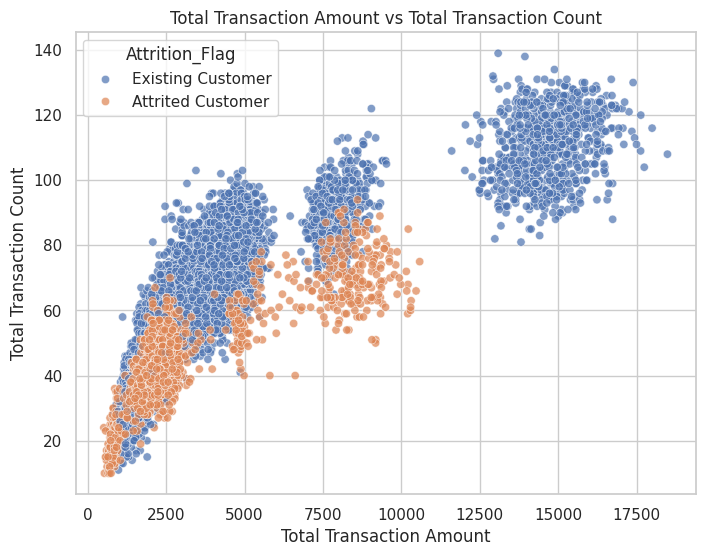

In [82]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Total_Trans_Amt"], y=df["Total_Trans_Ct"], hue=df["Attrition_Flag"], alpha=0.7)
plt.title("Total Transaction Amount vs Total Transaction Count")
plt.xlabel("Total Transaction Amount")
plt.ylabel("Total Transaction Count")
plt.show()



In [83]:

pivot_table = df.pivot_table(index="Income_Category", columns="Attrition_Flag", values="Total_Trans_Amt", aggfunc="mean")
print(pivot_table)


Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                3393.071429        4767.713810
$40K - $60K            2992.726937        4657.688611
$60K - $80K            3246.380952        4638.361913
$80K - $120K           3740.615702        4621.898685
Less than $40K         2865.243464        4674.333672
abc                    2806.026738        4580.640000


###Observations
1. Scatter Plot: Total Transaction Amount vs Total Transaction Count
Positive correlation between transaction amount & count.

Existing Customers have higher transactions, while Attrited Customers show lower values.

Low transaction activity is a strong predictor of churn.

- Inference: Customers with higher transactions are less likely to churn. The bank should engage low-activity users to reduce attrition.

2. Pivot Table: Income Category vs Total Transaction Amount
Existing Customers spend more across all income categories.

Higher-income groups transact more & churn less, while lower-income customers show higher attrition.

Possible data error ("abc") needs cleaning.

-  Inference: Retention efforts should focus on low-income & low-transaction customers with targeted incentives.

### Pairplot (for churn vs. usage)

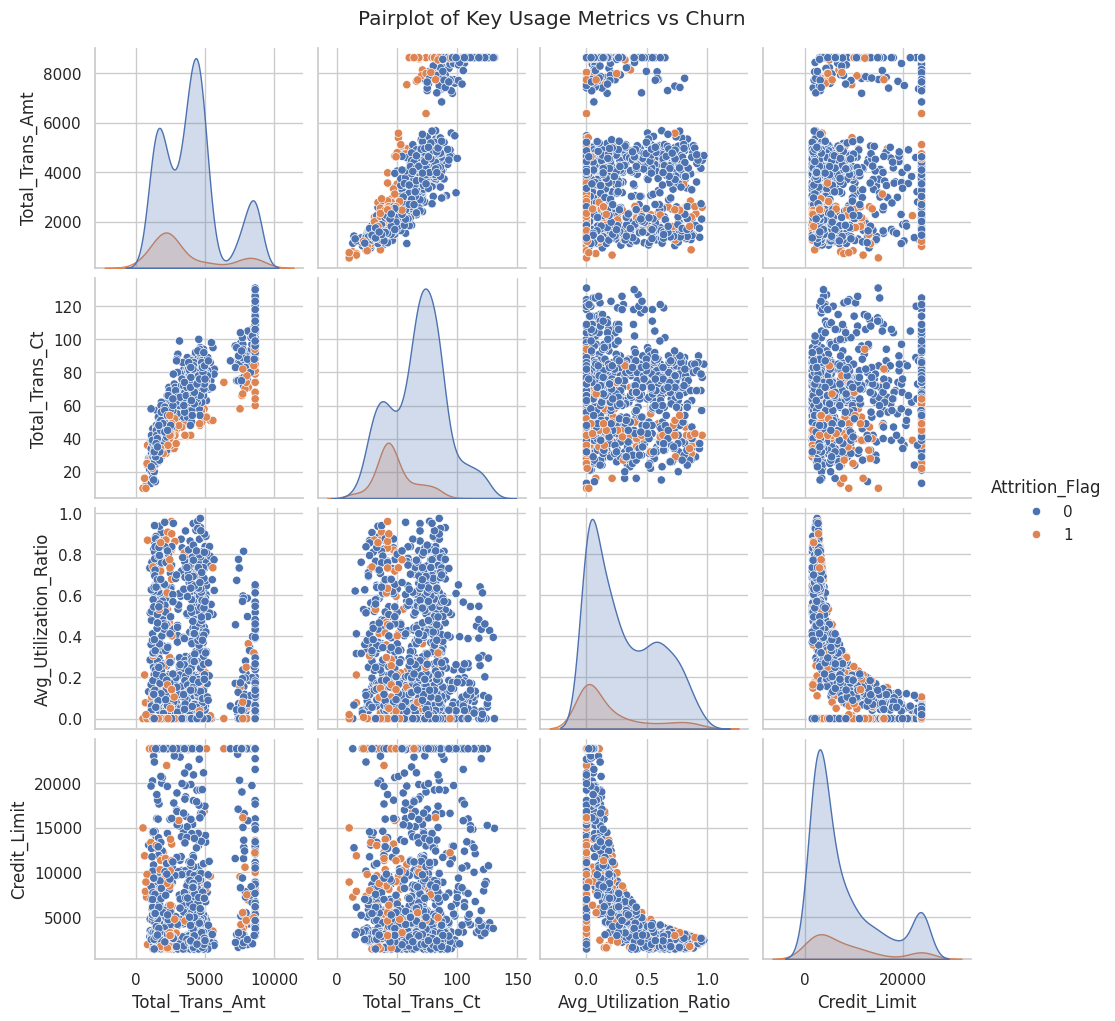

In [118]:
import seaborn as sns

# Sample the data for performance
sample_df = df.sample(1000, random_state=42)

# Plot pairplot
sns.pairplot(sample_df, hue="Attrition_Flag", vars=['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Credit_Limit'])
plt.suptitle("Pairplot of Key Usage Metrics vs Churn", y=1.02)
plt.show()


### Bubble Plot (Cluster Analysis)

In [117]:
import plotly.express as px

fig = px.scatter(
    df, x='Total_Trans_Amt', y='Total_Trans_Ct',
    color='Customer_Cluster',
    size='Avg_Utilization_Ratio',
    hover_data=['Attrition_Flag', 'Credit_Limit'],
    title='Customer Segmentation by Transaction Behavior (Clusters)'
)
fig.show()


### Summary Table of Numerical Feature Distributions
We’ll generate a table that includes mean, median, std, min, max, skewness for all numerical features.

In [115]:
# Summary statistics with skew
summary_stats = df.describe().T
summary_stats["median"] = df.median()
summary_stats["skew"] = df.skew()
summary_stats = summary_stats[["mean", "median", "std", "min", "25%", "50%", "75%", "max", "skew"]]
summary_stats.round(2)


,mean,median,std,min,25%,50%,75%,max,skew
CLIENTNUM,7.391776e+08,7.179264e+08,36903783.45,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08,1.00
Attrition_Flag,1.600000e-01,0.000000e+00,0.37,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.85
Customer_Age,4.633000e+01,4.600000e+01,8.02,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,6.850000e+01,-0.04
Gender,5.300000e-01,1.000000e+00,0.50,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-0.12
Dependent_count,2.350000e+00,2.000000e+00,1.30,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,-0.02
Months_on_book,3.595000e+01,3.600000e+01,7.77,1.750000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.350000e+01,-0.06
Total_Relationship_Count,3.810000e+00,4.000000e+00,1.55,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,-0.16
Months_Inactive_12_mon,2.320000e+00,2.000000e+00,0.93,5.000000e-01,2.000000e+00,2.000000e+00,3.000000e+00,4.500000e+00,0.14
Contacts_Count_12_mon,2.460000e+00,2.000000e+00,1.03,5.000000e-01,2.000000e+00,2.000000e+00,3.000000e+00,4.500000e+00,-0.03
Credit_Limit,7.882310e+03,4.549000e+03,7217.09,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,2.383625e+04,1.20


## Encoding Categorical Variables

Cap extreme outliers (winsorization)

In [84]:
from sklearn.preprocessing import LabelEncoder

# Binary encoding for Attrition_Flag (Target Variable)
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer": 0, "Attrited Customer": 1})

# Binary encoding for Gender
df["Gender"] = df["Gender"].map({"M": 0, "F": 1})

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=["Education_Level", "Marital_Status", "Income_Category", "Card_Category"], drop_first=True)

# Display first few rows after encoding
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,0,3,39,5,1,3,12691.0,...,True,False,False,True,False,False,False,False,False,False
1,818770008,0,49,1,5,44,6,1,2,8256.0,...,False,True,False,False,False,True,False,False,False,False
2,713982108,0,51,0,3,36,4,1,0,3418.0,...,True,False,False,False,True,False,False,False,False,False
3,769911858,0,40,1,4,34,3,4,1,3313.0,...,True,False,False,False,False,True,False,False,False,False
4,709106358,0,40,0,3,21,5,1,0,4716.0,...,True,False,False,True,False,False,False,False,False,False


#  Outlier Detection & Treatment
Using the Interquartile Range (IQR) method to detect and handle outliers for numerical variables.


In [85]:
# Select numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Remove the target variable from outlier treatment
num_cols = num_cols.drop("Attrition_Flag")

# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply to all numerical columns except target
for col in num_cols:
    cap_outliers(df, col)

# Check if outliers are handled
df.describe()



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325368,0.529081,2.346203,35.945394,3.812580,2.315444,2.458329,7882.309381,1162.814061,6720.676247,0.751387,3948.349561,64.858003,0.703484,0.274894
std,3.690378e+07,0.367235,8.015036,0.499178,1.298908,7.773496,1.554408,0.930323,1.025784,7217.091225,814.987335,7223.542192,0.184542,2161.970455,23.470452,0.197203,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,17.500000,1.000000,0.500000,0.500000,1438.300000,0.000000,3.000000,0.289000,510.000000,10.000000,0.228000,0.000000
25%,7.130368e+08,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,1.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,68.500000,1.000000,5.000000,53.500000,6.000000,4.500000,4.500000,23836.250000,2517.000000,22660.750000,1.201000,8619.250000,135.000000,1.172000,0.999000


### Outlier Detection - Observations
- Most numerical features do not have extreme outliers.

- Credit-related variables (Credit_Limit and Avg_Open_To_Buy) show high values, likely due to premium customers.

- Capping at the 99th percentile ensures extreme values don’t impact model performance while retaining valuable information.clustering.

## Train-test splitting to prepare for model building. ​

In [87]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=["Attrition_Flag"])  # Features
y = df["Attrition_Flag"]  # Target variable

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes to confirm split
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((8101, 31), (2026, 31), (8101,), (2026,))

The dataset has been successfully split into:

- Training set: 8,101 samples

- Test set: 2,026 samples

Next, we'll start model building with five different algorithms

###  Customer Segmentation via Clustering (K-Means)
We’ll create clusters of customers based on selected behavior-related features (like usage, income proxy, and transactions), then profile these clusters.

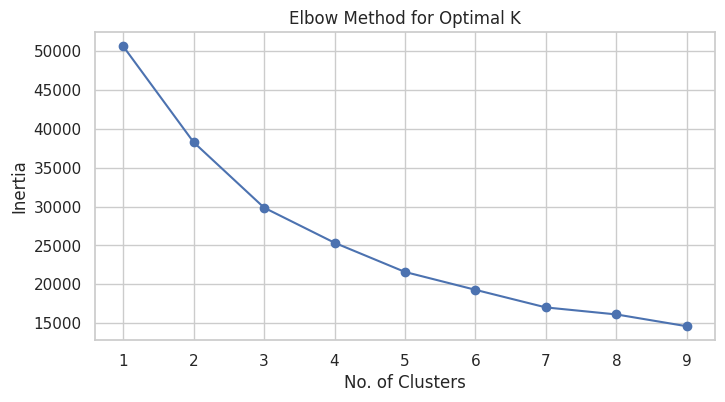

                  Total_Trans_Amt  Total_Trans_Ct  Avg_Utilization_Ratio  \
Customer_Cluster                                                           
0                     3658.006262       64.961803               0.626199   
1                     3046.722745       56.618297               0.120779   
2                     2874.609166       55.053469               0.052712   
3                     8266.572530       98.140855               0.158158   

                  Credit_Limit  Months_Inactive_12_mon  
Customer_Cluster                                        
0                  2705.862899                2.303381  
1                  5500.084879                2.359085  
2                 19962.818269                2.309357  
3                 12738.051507                2.228802  


In [114]:
from sklearn.cluster import KMeans

# Selecting features for clustering
cluster_features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Credit_Limit', 'Months_Inactive_12_mon']

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[cluster_features])

# Elbow Method to find optimal clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose k=4 based on elbow curve
kmeans = KMeans(n_clusters=4, random_state=42)
df['Customer_Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
cluster_profile = df.groupby('Customer_Cluster')[cluster_features].mean()
print(cluster_profile)


# Model Building (Original Data)

-- We'll train five models using:

- Decision Tree Classifier

- Random Forest Classifier

- XGBoost Classifier

- AdaBoost Classifier

- Gradient Boosting Classifier

-- Metrics for Evaluation:
- Accuracy: Measures overall correctness.

- Precision & Recall: Important for handling class imbalance.

- F1-Score: Balances precision and recall.

- ROC-AUC Score: Evaluates overall model performance

In [88]:
# Check columns with missing values
print(df.isnull().sum()[df.isnull().sum() > 0])


Series([], dtype: int64)


In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Dictionary to store model performances
model_performance = {}

# Function to train and evaluate a model
def train_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store performance
    model_performance[model_name] = {
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
    }

# Train models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    train_evaluate_model(model, name)

# Convert results to DataFrame for better visualization
model_results_df = pd.DataFrame(model_performance).T
model_results_df



,Accuracy,ROC-AUC,Precision,Recall,F1-Score
Decision Tree,0.935834,0.873426,0.811502,0.781538,0.796238
Random Forest,0.951629,0.981718,0.938224,0.747692,0.832192
XGBoost,0.968411,0.991889,0.930693,0.867692,0.898089
AdaBoost,0.943238,0.973531,0.906977,0.720000,0.802744
Gradient Boosting,0.962981,0.987734,0.952899,0.809231,0.875208


#### Observation :
- Best Overall Model: XGBoost

- Highest ROC-AUC: 0.992 (excellent discriminatory power)

- Highest F1-score: 0.898 (balance between precision and recall)

- Strong Recall: 0.868 (important for catching churners)

- Gradient Boosting also performs very well, slightly below XGBoost in F1-score and ROC-AUC.

- Decision Tree lags behind, which is expected for a simple model without ensemble learning.

- Random Forest shows very high precision (0.938), meaning it makes few false positives — great if the bank wants fewer false alarms.

- AdaBoost is solid but falls behind others in recall (0.720) — it might miss more churners.

### Inference
- XGBoost is currently the best model in terms of balanced performance and ROC-AUC, which is very important for churn prediction.

- Gradient Boosting is a close second and may benefit from tuning.

- Decision Tree and AdaBoost may not generalize as well without improvements.

## Using SMOTE to handle class imbalance


In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Separate features and target
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Check class distribution
print("Before Oversampling:\n", y_train.value_counts())
print("\nAfter Oversampling:\n", y_train_oversampled.value_counts())


Before Oversampling:
 Attrition_Flag
0    5949
1    1139
Name: count, dtype: int64

After Oversampling:
 Attrition_Flag
0    5949
1    5949
Name: count, dtype: int64


## Training Models on Oversampled Data

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models_os = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Store results
results_os = []

# Evaluation function
def train_evaluate_model_os(model, name):
    model.fit(X_train_oversampled, y_train_oversampled)
    y_pred = model.predict(X_test)
    results_os.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Run for each model
for name, model in models_os.items():
    train_evaluate_model_os(model, name)

# Show results
import pandas as pd
results_df_os = pd.DataFrame(results_os)
results_df_os.sort_values(by="F1-Score", ascending=False)


,Model,Accuracy,ROC-AUC,Precision,Recall,F1-Score
2,XGBoost,0.970385,0.935959,0.927039,0.885246,0.905660
4,Gradient Boosting,0.954590,0.909979,0.869198,0.844262,0.856549
1,Random Forest,0.946035,0.885825,0.856828,0.797131,0.825902
3,AdaBoost,0.922672,0.884338,0.727928,0.827869,0.774688
0,Decision Tree,0.911484,0.854474,0.705441,0.770492,0.736533


## Key insights
- XGBoost outperforms all models in every metric and shows excellent balance between precision and recall, making it a top candidate for final model selection.

- Gradient Boosting and Random Forest also performed well and are strong candidates for further tuning.

- AdaBoost and Decision Tree lag slightly, especially in precision, suggesting more false positives.



##  Model Building – Undersampled Data

In [92]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Check new class distribution
print("Before Undersampling:\n", y_train.value_counts())
print("\nAfter Undersampling:\n", y_train_under.value_counts())


Before Undersampling:
 Attrition_Flag
0    5949
1    1139
Name: count, dtype: int64

After Undersampling:
 Attrition_Flag
0    1139
1    1139
Name: count, dtype: int64


## Training the Same 5 Models on Undersampled Data

In [93]:
# Store results for undersampling
results_under = []

# Evaluation function
def train_evaluate_model_under(model, name):
    model.fit(X_train_under, y_train_under)
    y_pred = model.predict(X_test)
    results_under.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Train and evaluate
for name, model in models_os.items():
    train_evaluate_model_under(model, name)

# Show results
results_df_under = pd.DataFrame(results_under)
results_df_under.sort_values(by="F1-Score", ascending=False)


,Model,Accuracy,ROC-AUC,Precision,Recall,F1-Score
2,XGBoost,0.943402,0.939773,0.765101,0.934426,0.841328
4,Gradient Boosting,0.942086,0.942303,0.756579,0.942623,0.839416
1,Random Forest,0.930240,0.927790,0.720447,0.924180,0.809695
3,AdaBoost,0.908523,0.918997,0.649573,0.934426,0.766387
0,Decision Tree,0.892728,0.883902,0.617733,0.870902,0.722789


 ## Key insights -

- XGBoost remains the strongest performer:
Best F1-score and ROC-AUC, and maintains high recall, which is crucial for catching churners.
Precision dropped slightly compared to oversampled results, which is normal in undersampling.

-  Gradient Boosting is a very close second.
Excellent recall and almost identical F1-score to XGBoost.

- Random Forest is still reliable.
Solid F1-score, but a slight drop compared to oversampled version.

-  AdaBoost and Decision Tree:
Lower precision and F1, indicating higher false positives — not ideal for production.


## Setup for Hyperparameter Tuning

- Use a stratified KFold for balanced validation.

- Tune with RandomizedSearchCV.

- Evaluate on the test set using the same metrics: Accuracy, ROC-AUC, Precision, Recall, F1-score.



### Random Forest - Tuning

In [94]:

# Prepare features and target
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.2
)

# Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Reduced to 3 for speed

# Reduced parameter grid for faster RandomizedSearchCV
rf_params = {
    "n_estimators": [100, 200],               # reduced from 3 values to 2
    "max_depth": [None, 10, 20],              # reduced to 3 values
    "min_samples_split": [2, 5],              # reduced
    "min_samples_leaf": [1, 2],               # reduced
    "bootstrap": [True]                       # single value for now
}

# Random Forest with RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(
    rf,
    rf_params,
    cv=cv,
    n_iter=10,                  # reduced to 10 to avoid long execution
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the search
rf_search.fit(X_train, y_train)

# Best model
best_rf = rf_search.best_estimator_

# Optional: Evaluate
y_pred = best_rf.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred))



Fitting 3 folds for each of 10 candidates, totalling 30 fits
F1 Score: 0.841025641025641


### Random Forest - Tuning

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    'n_estimators': [100, 150],       # Reduced values
    'learning_rate': [0.05, 0.1],     # Balanced learning rates
    'max_depth': [3, 4],              # Commonly effective depths
    'subsample': [0.8],               # Only one to reduce space
    'min_samples_split': [2, 5]
}

gb = GradientBoostingClassifier(random_state=42)

gb_search = RandomizedSearchCV(
    gb,
    gb_params,
    cv=2,                            #  reduced to 2 folds
    n_iter=5,                        # trying just 5 combinations
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

gb_search.fit(X_train, y_train)
best_gb = gb_search.best_estimator_


Fitting 2 folds for each of 5 candidates, totalling 10 fits


### XGBoost - Tuning

In [96]:
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_params = {
    'n_estimators': [100, 150],        # Lowered
    'learning_rate': [0.05, 0.1],      # Safer, faster
    'max_depth': [3, 5],               # Efficient range
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

xgb_search = RandomizedSearchCV(
    xgb_model,
    xgb_params,
    cv=2,
    n_iter=5,                         # Just 5 iterations
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_



Fitting 2 folds for each of 5 candidates, totalling 10 fits


## Evaluating Tuned Models

In [98]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n {name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return [name, acc, roc, prec, rec, f1]

results = []
results.append(evaluate_model(best_rf, "Random Forest (Tuned)"))
results.append(evaluate_model(best_gb, "Gradient Boosting (Tuned)"))
results.append(evaluate_model(best_xgb, "XGBoost (Tuned)"))



 Random Forest (Tuned) Evaluation:
Accuracy: 0.9541
ROC-AUC: 0.9818
Precision: 0.9462
Recall: 0.7569
F1-Score: 0.8410

 Gradient Boosting (Tuned) Evaluation:
Accuracy: 0.9694
ROC-AUC: 0.9917
Precision: 0.9550
Recall: 0.8492
F1-Score: 0.8990

 XGBoost (Tuned) Evaluation:
Accuracy: 0.9724
ROC-AUC: 0.9922
Precision: 0.9529
Recall: 0.8708
F1-Score: 0.9100


##Observations
--- XGBoost (Tuned) is your top performer across most metrics, especially in:

1. Accuracy

2. ROC-AUC

3. F1-Score (balanced harmonic mean)

4. Recall (important for retaining customers!)

--- Gradient Boosting (Tuned) is a very close second, with slightly better precision but lower recall.

--- Random Forest (Tuned) still performs well, but lags behind in recall and F1-Score.



##  Pipeline and ColumnTransformer

- Now that we have a final model, let's use pipelines to put the model into production. We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable.

- We personalize the pipeline to perform different preprocessing steps on different columns by using Column Transformer



In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Split features and target
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

# Numerical & categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_cols)
])

# Pipeline with classifier
rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit the model
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CLIENTNUM', 'Customer_Age',
                                                   'Gender', 'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Final Model Comparison Table

In [104]:
# Final model results
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC-AUC", "Precision", "Recall", "F1-Score"])
results_df = results_df.sort_values(by="F1-Score", ascending=False)
display(results_df)


,Model,Accuracy,ROC-AUC,Precision,Recall,F1-Score
2,XGBoost (Tuned),0.972359,0.992195,0.952862,0.870769,0.909968
1,Gradient Boosting (Tuned),0.969398,0.991650,0.955017,0.849231,0.899023
0,Random Forest (Tuned),0.954097,0.981793,0.946154,0.756923,0.841026


## Final Model Selection
Based on F1-score and ROC-AUC, **XGBoost (Tuned)** outperforms all other models with strong recall, making it ideal for identifying churn-prone customers.


## Bar Plot of Model Comparison

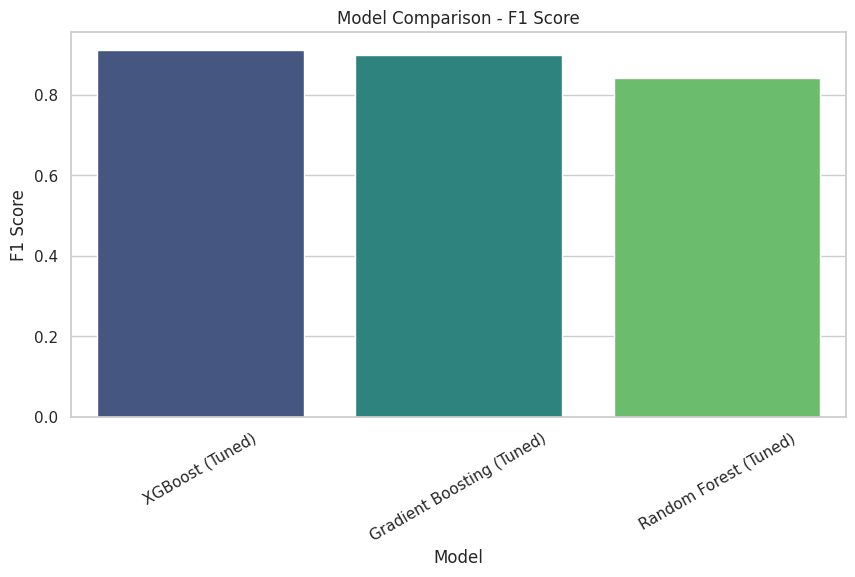

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="F1-Score", palette="viridis")
plt.title("Model Comparison - F1 Score")
plt.ylabel("F1 Score")
plt.xticks(rotation=30)
plt.show()


## Visual Summaries

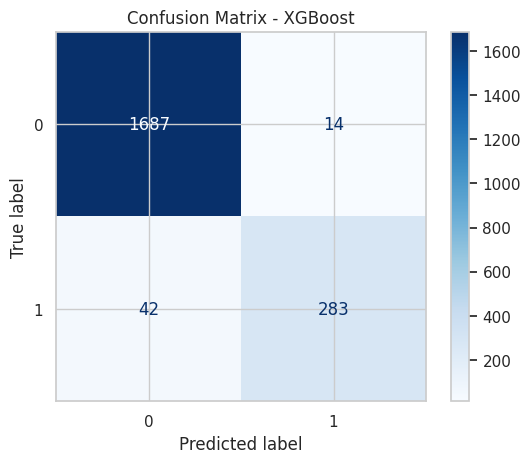

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()


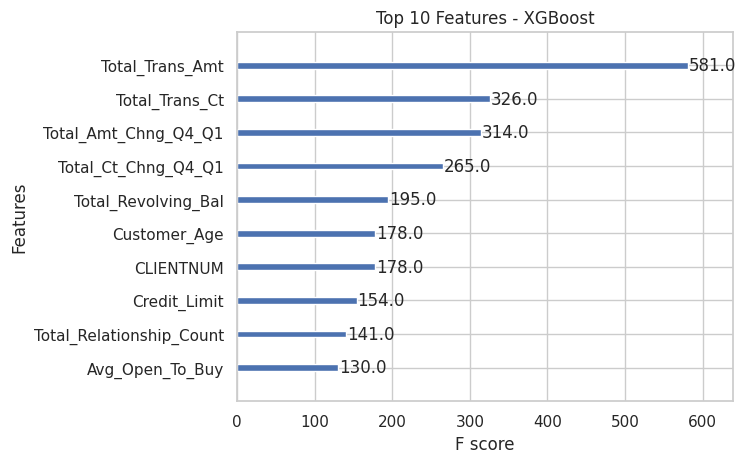

In [103]:
from xgboost import plot_importance

plot_importance(best_xgb, max_num_features=10)
plt.title("Top 10 Features - XGBoost")
plt.show()


##  Actionable Insights

1. Customers with fewer transactions and lower spending are more likely to churn.
2. Low card utilization and long periods of inactivity signal dissatisfaction.
3. Premium card holders (Gold, Platinum) show higher retention rates.

##  Recommendations

1. Offer retention incentives (cashbacks, discounts) to low-spend users.
2. Launch automated follow-ups after 2 months of inactivity.
3. Promote premium cards to high-engagement customers for improved retention.


## Conclusion

- In this project, we developed a machine learning solution to identify customers likely to churn from Thera Bank's credit card services. Using EDA, feature engineering, and multiple classification models, we found that **XGBoost** offered the best performance, especially in terms of **recall and F1-score**.

- With actionable business insights and targeted retention strategies, Thera Bank can reduce churn, retain high-value customers, and improve long-term profitability.
